# Life Expectancy Project (Preprocessing file):

In [5]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import skimpy 
from skimpy import skim
import ptitprince as pt
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv("LE_Dataset.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
strs=["Country", "Status"]
df=df.astype({i:"string" for i in strs})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   string 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   string 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
ptr = PowerTransformer(method='yeo-johnson')
skewed_columns = df.columns[df.skew().abs() > 0.5]  # Adjust threshold based on your needs

df[skewed_columns] = pt.fit_transform(df[skewed_columns])

C:\Users\iraha\AppData\Local\Temp\ipykernel_16328\258784365.py:2: FutureWarning: <class 'pandas.core.arrays.string_.StringArray'>._reduce will require a `keepdims` parameter in the future
  skewed_columns = df.columns[df.skew().abs() > 0.5]  # Adjust threshold based on your needs


TypeError: Cannot perform reduction 'skew' with string dtype

In [3]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2938   │ │ float64     │ 16    │                                                          │
│ │ Number of columns │ 22     │ │ int32       │ 4     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25    ┃ p50     ┃ p75     ┃ p100       ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Year        │   0 │     0 │     2008 │    4.614 │  2000 │   2004 │    2008 │    2012 │       2015 │ ▇▅▇▅▇▇ │  │
│ │ Life        │  10 │  0.34 │    69.22 │    9.524 │  36.3 │   63.1 │    72.1 │    75.7 │         89 │  ▁▃▅▇▂ │  │
│ │ expectancy  │     │       │          │          │       │        │         │         │            │        │  │
│ │ Adult       │  10 │  0.34 │    164.8 │    124.3 │     1 │     74 │     144 │     228 │        723 │  ▇▇▃▁  │  │
│ │ Mortality   │     │       │          │          │       │        │         │         │            │        │  │
│ │ infant      │   0 │     0 │     30.3 │    117.9 │     0 │      0 │       3 │      22 │       1800 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Alcohol     │ 194 │   6.6 │    4.603 │    4.052 │  0.01 │ 0.8775 │   3.755 │   7.703 │      17.87 │ ▇▃▃▂▁  │  │
│ │ percentage  │   0 │     0 │    738.3 │     1988 │     0 │  4.685 │   64.91 │   441.5 │      19480 │   ▇    │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Hepatitis B │ 553 │ 18.82 │    80.94 │    25.07 │     1 │     77 │      92 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Measles     │   0 │     0 │     2420 │    11470 │     0 │      0 │      17 │   360.2 │     212200 │   ▇    │  │
│ │  BMI        │  34 │  1.16 │    38.32 │    20.04 │     1 │   19.3 │    43.5 │    56.2 │       87.3 │ ▃▆▃▇▃  │  │
│ │ under-five  │   0 │     0 │    42.04 │    160.4 │     0 │      0 │       4 │      28 │       2500 │   ▇    │  │
│ │ deaths      │     │       │          │          │       │        │         │         │            │        │  │
│ │ Polio       │  19 │  0.65 │    82.55 │    23.43 │     3 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │ Total       │ 226 │  7.69 │    5.938 │    2.498 │  0.37 │   4.26 │   5.755 │   7.492 │       17.6 │  ▂▇▆▂  │  │
│ │ expenditure │     │       │          │          │       │        │         │         │            │        │  │
│ │ Diphtheria  │  19 │  0.65 │    82.32 │    23.72 │     2 │     78 │      93 │      97 │         99 │ ▁  ▁▂▇ │  │
│ │  HIV/AIDS   │   0 │     0 │    1.742 │    5.078 │   0.1 │    0.1 │     0.1 │     0.8 │       50.6 │   ▇    │  │
│ │ GDP         │ 448 │ 15.25 │     7483 │    14270 │ 1.681 │  463.9 │    1767 │    5911 │     119200 │   ▇▁   │  │
│ │ Population  │ 652 │ 22.19 │ 12750000 │ 61010000 │   

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

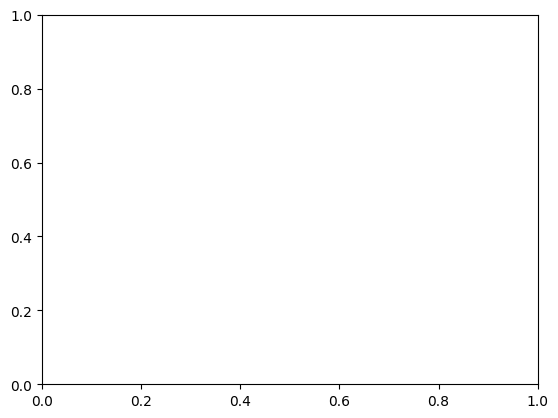

In [4]:
pt.RainCloud(df, x="country", y="")